# Final Project: Analyzing Death Tolls in Prisons

### Table of Contents: ###
##### **Section 1:** Introduction #####
##### **Section 2:** Exploring Trends in the Causes of Death, and the Death Tolls #####
##### **Section 3**: Gender Disparities in California Jails #####
##### **Section 4:** More Visualizations and Concluding Remarks #####

## Section 1: Introduction ##
In my final project, I will explore trends in the prison death data from Reuters. This data was collected to publicize the deaths that occur in jails across all 50 states between 2008 and 2019. Without this data collection initiative, this data would not be public. Reuters sent out 1,500+ requests to access this data, which state governments are required to respond to.  Through coding up this notebook, I aim to understand trends in the data, like what are the highest causes of death in California, or how deaths have increased/decreased over time. (https://www.reuters.com/investigates/special-report/usa-jails-graphic/). 

**One question that I'd like to answer is "What are the leading factors that influence death tolls in California jails and how can they be mitigated?"**

While coding and analyzing the data, I will be careful of accidentally portraying misinformation or a false narrative with the data analysis. I will also be sure to make claims about my data visualizations and support them with research, or disprove the claim to understand biases in the data.

Let's start by exploring the data for inmate deaths in California. When downloading the CSV format of the data on the website, I get back a folder with 3 files, which are attached to this repository:
1. California_deaths.csv
2. California_jails.csv
3. reuters-jail-deaths-code.xlsx 

File 2 provides 39 California jails and their IDs, with the note for each jail stating: "In 2011, a California law known as “realignment” shifted the incarceration of “non-serious, non-violent, non-sex” convicts from state prisons to county jails. As a result, jail inmates in California may have longer average stays than jail inmates in other states. Sheriffs often complain the change puts substantial staffing and budget pressures on jails without adequate funding." This file is simply metadata and is not our main data of interest.

File 3 provides more metadata for the codes in the CSV file. For example, "d2008" means "total deaths in 2008" and "il2008" means "illness/natural deaths in 2008." This is also not the main data of interest.

The main data of interest is in File 1. I will display a few rows just to show what the format is like.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

deaths_data = pd.read_csv("California_deaths.csv", encoding='ISO-8859-1')

# sample the first 10 rows of the file
deaths_sample = deaths_data.head(10)
print(deaths_sample)

     id state   county                                             jail  year  \
0  36.0    CA  Alameda  Alameda County Glenn E. Dyer Detention Facility  2010   
1  36.0    CA  Alameda  Alameda County Glenn E. Dyer Detention Facility  2011   
2  36.0    CA  Alameda  Alameda County Glenn E. Dyer Detention Facility  2011   
3  36.0    CA  Alameda  Alameda County Glenn E. Dyer Detention Facility  2014   
4  36.0    CA  Alameda  Alameda County Glenn E. Dyer Detention Facility  2015   
5  35.0    CA  Alameda                   Alameda County Santa Rita Jail  2008   
6  35.0    CA  Alameda                   Alameda County Santa Rita Jail  2008   
7  35.0    CA  Alameda                   Alameda County Santa Rita Jail  2008   
8  35.0    CA  Alameda                   Alameda County Santa Rita Jail  2008   
9  35.0    CA  Alameda                   Alameda County Santa Rita Jail  2008   

  date_of_death full_name last_name first_name mid_name  ... cause_short  \
0     5/13/2010       NaN   JOHN

From the sample, we can see that the CSV file contains the jail ID, the state, county, jail name, year, inmate's date of death, their name (4 columns with full_name. last_name, first_name, and mid_name; all full_name values are empty), suffix, date_incarcerated, cause of death shortened into a code, full detail of cause of death, and demographic data (spanning the next 7 columns).

## Section 2: Exploring Trends in the Causes of Death, and the Death Tolls ##
For my first Exploratory Data Visualization, I want to explore the number of deaths per cause in California.

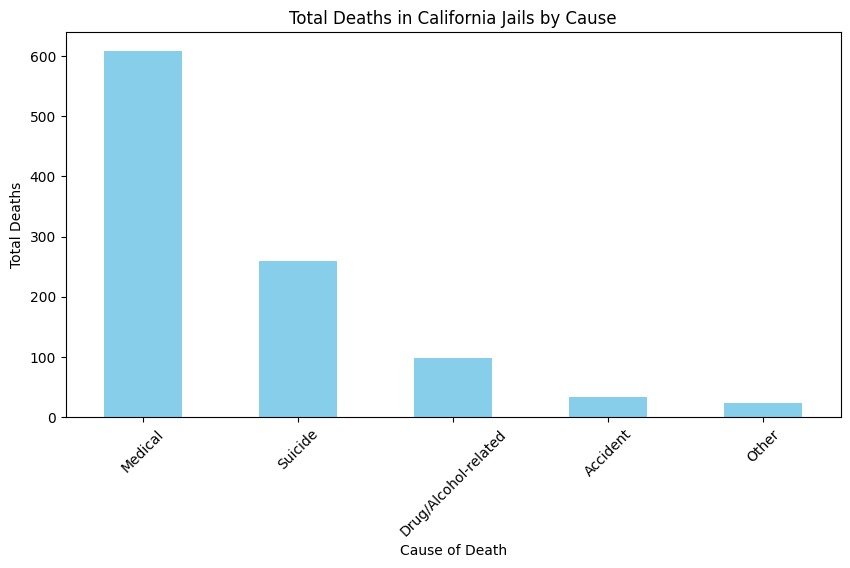

In [51]:
cause_descriptions = {
    'S': 'Suicide',
    'DA': 'Drug/Alcohol-related',
    'IL': 'Illness/Natural',
    'O': 'Other',
    'HO': 'Homicide',
    'AC': 'Accident',
    'M': 'Medical',
}

# replace shortened death cause codes with their descriptions
deaths_data['cause_description'] = deaths_data['cause_short'].map(cause_descriptions)

deaths_data_filtered = deaths_data.dropna(subset=['cause_description'])

deaths_by_cause_description = deaths_data_filtered['cause_description'].value_counts()

plt.figure(figsize=(10, 5))
deaths_by_cause_description.plot(kind='bar', color='skyblue')
plt.xlabel('Cause of Death')
plt.ylabel('Total Deaths')
plt.title('Total Deaths in California Jails by Cause')
plt.xticks(rotation=45)
plt.show()

From the above plot, we can see that medical-related deaths are the highest cause of death. This can include deaths by chronic diseases, acute medical conditions, infections, or untreated/under-treated conditions. The causes of death that follow are Suicide, Drug/Alcohol-related deaths, Accident, and Other causes.

I decided to conduct further research to back this trend:
**1. The Sacramento Bee article, published on 11/08/23:** https://www.sacbee.com/news/politics-government/the-state-worker/article281554588.html
According to the watchdog report by the Office of the Inspector General, "a third of California's (34, now 33) adult prisons provide an "inadequate" level of medical care to their inmate patients. The pandemic caused a decline in performance and contributed to the lack of quality care. 23 of the prisons earned "adequate" rankings while no facilities earned the top ranking of "proficient."

**2. KCRA Article, published on 06/27/24:** https://www.kcra.com/article/federal-judges-fines-california-prison-system-mental-health-care/61446246
A federal judge recently fined the California prison system $112 million for not providing enough mental health care to inmates. The fine comes from the state cutting costs for the Department of Corrections and Rehabilitation. With the fine, the judge "ordered the state to put that money in a special account reserved for inmate help." Moreover, 30% of rehabilitation-related occupations (social workers and psychiatrists) have not been filled for years.

**3. Public Policy Institute of California report, published in June 2014:** https://www.ppic.org/publication/health-care-for-californias-jail-population/
In 2012, there were 2.3 million health-care related visits that were provided to county jail inmates in California. This was 200,000 medical visits each month, which averages out to 2.4 medical visits per inmate.

In the context of my visualization, a lack of good healthcare (in a third of adult prisons) and lack of funding are strong factors that influence the amount of medical-related deaths, making it the category with the highest amount of deaths. The next exploratory data visualization will plot out total inmate deaths per year.

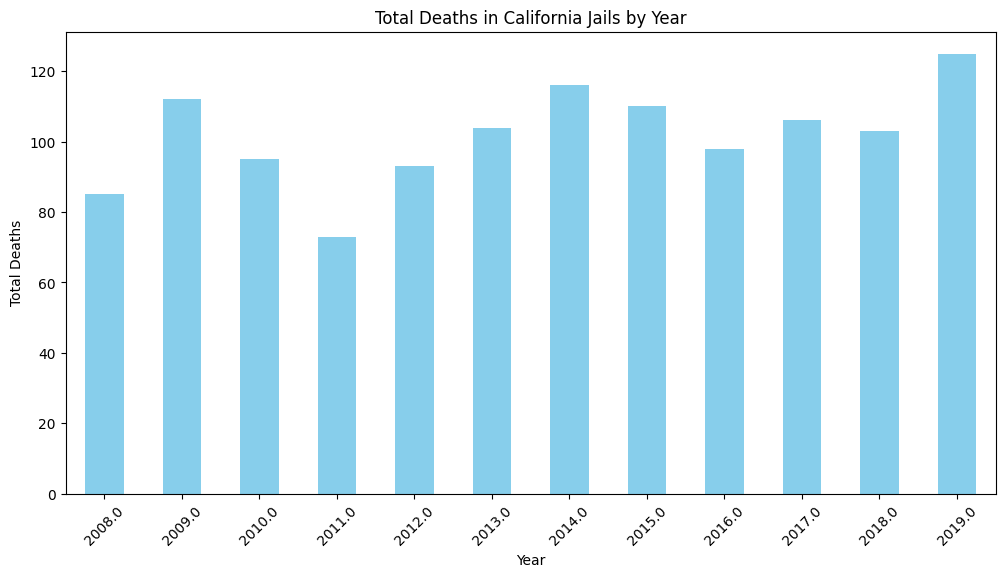

In [52]:
deaths_data['year'] = pd.to_datetime(deaths_data['date_of_death'], errors='coerce').dt.year

deaths_per_year = deaths_data['year'].value_counts().sort_index()

# filter out the year 2020 from the data, since data was collected 2008-2019
deaths_per_year_filtered = deaths_per_year[deaths_per_year.index != 2020.0]

plt.figure(figsize=(12, 6))
deaths_per_year_filtered.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title('Total Deaths in California Jails by Year')
plt.xticks(rotation=45)
plt.show()

The above visualization has an overall positive trend in death tolls over time. There are years where it will dip (like 2011, 2016, 2018), but from 2008 to 2019, the deaths are strictly increasing. We will ignore 2020 since the collected data from Reuters is intended to be from 2008 to 2019.

**What does this data visualization suggest about the state of California jails?**
1. Quality of healthcare in jails have dropped over time, leaving inmates neglected and therefore leading to higher deaths over time.
2. The California government has cut costs for jails over time.

**Source to back my claims:**
1. **CalMatters article, published on 03/25/24:** https://calmatters.org/justice/2024/03/death-in-california-jails/
This article has more deaths than what was in the Reuters dataset. More than 2,700 people have died in California jails since 2005. The article is also critical of Newsom's promises to prevent deaths in 2019; ever since 2019, more people have died in jails, "hitting a high of 215 in 2022." The article states that natural causes are the biggest share of deaths, with suicides following right after. This connects to an analysis of mental health resources in prisons later in this notebook. The third largest share of deaths were caused by drug overdoses, like accidental deaths caused by fentanyl overdoses.


## Section 3: Gender Disparities in California Jails ##

In this section, I will analyze the data to understand gender disparities in California jail between men and women inmates. Let's start by analyzing the amount of male deaths and the amount of female deaths in California jails.

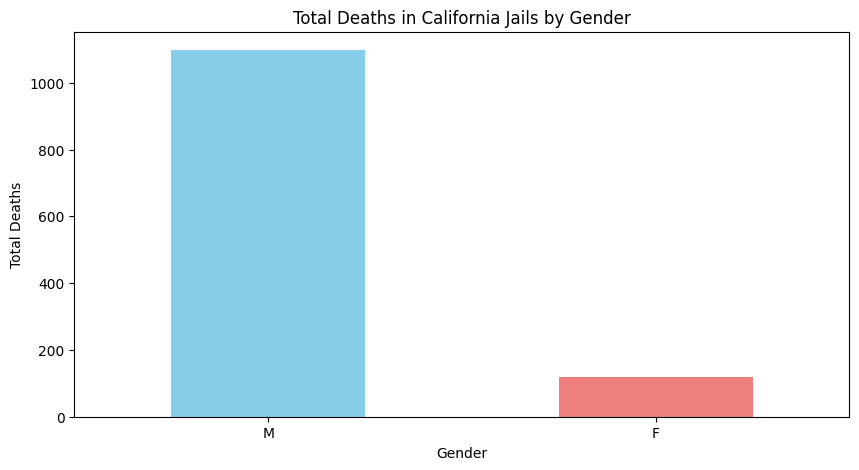

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# filter out rows where the person's gender is missing
deaths_data_filtered = deaths_data.dropna(subset=['gender'])

# count number of deaths for each gender
deaths_by_gender = deaths_data_filtered['gender'].value_counts()

plt.figure(figsize=(10, 5))
deaths_by_gender.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.xlabel('Gender')
plt.ylabel('Total Deaths')
plt.title('Total Deaths in California Jails by Gender')
plt.xticks(rotation=0)
plt.show()

The above plot shows that there are much more deaths for male inmates than female inmates. This inequality suggests that there are higher male incarceration rates in California. What else does it suggest?

1. Men and women might be incarcerated for different types of crimes, with men more likely to be incarcerated for longer sentences or more severe crimes.
2. There are differences in health and risk behaviors between men and women. This includes substance abuse, violence, or neglected medical treatment of inmates caused by lack of resources and triaging issues.
3. Quality of healthcare may differ by gender. If male facilities are overcrowded with less healthcare access, then this could contribute to higher male death tolls.

When seeking existing research to back my claims above, the research actually does not support these claims, or the visualization. This could suggest that the data collection methods were skewed more towards male-only facilities.
1. Improving Access to Health Care for California's Women Prisoners by Nancy Stoller: chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.prisonlegalnews.org/media/publications/improving_health_care_for_ca_women_prisoners_2001.pdf
Women have higher barriers to healthcare access, since they have "unique health care needs associated with pregnancy, childbirth, and gynecological and breast health." Women are also more likely to report "drug addictions and histories as victims of violence and sexual assault," which opens them up to a wider range of needs and services that extend past the needs of male inmates. 

2. The Gender Divide: Tracking Women's State Prison Growth by Wendy Sawyer for Prison Policy Initiative, published 01/09/18: https://www.prisonpolicy.org/reports/women_overtime.html
This report tracks prison population trends since 1978 for all 50 states. Over time, "women have become the fastest-growing segment of the incarcerated population." To be specific, the women inmate population "grew 834% over nearly 40 years -- more than double the pace of the growth among men." This further suggests that the data collection by Reuters (for California) is biased towards male inmates; male deaths are higher than the women deaths, but the growth of the overall women inmate population has outpaced the male inmate population.

The next visualization explores distribution of deaths by gender and age.


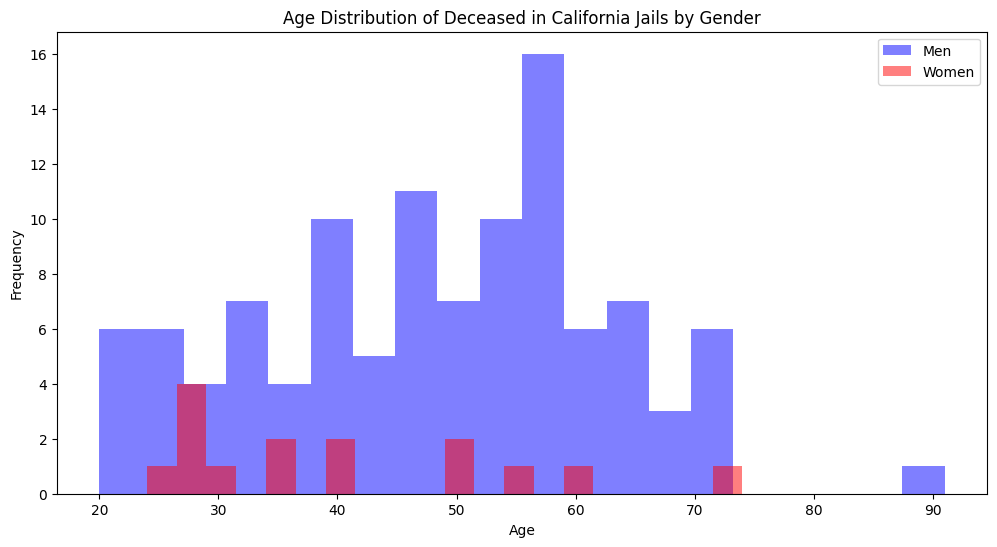

In [53]:
# filter out rows where age or gender is missing
deaths_data_age_filtered = deaths_data.dropna(subset=['age', 'gender'])

plt.figure(figsize=(12, 6))
deaths_data_age_filtered[deaths_data_age_filtered['gender'] == 'M']['age'].plot(kind='hist', bins=20, alpha=0.5, label='Men', color='blue')
deaths_data_age_filtered[deaths_data_age_filtered['gender'] == 'F']['age'].plot(kind='hist', bins=20, alpha=0.5, label='Women', color='red')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Deceased in California Jails by Gender')
plt.legend()
plt.show()


In the above visualization, we can see that the highest amount of men deaths are around 50 to 60 years old. The highest amount of women deaths are around 25 to 32 years old. This could be due to neglected health care for older men, with chronic illnesses/disorders. From the earlier research, the younger women deaths could be attributed to substance abuse and trauma. Sources to support this claim:

1. **Sex Differences in Risk Factors for Mortality After Release from Prison established by Minnesota Department of Corrections:** chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://mn.gov/doc/assets/Gender%20and%20Mortality%20-%20DOC%20version_tcm1089-604411.pdf
Even though this report is about risk factors for death after release from prison, we can extrapolate the death reasons for individuals held in jails for long periods of time. The report finds "that release type and frequency of healthcare access were more strongly related to mortality among women, while educational achievement was more strongly related to mortality among men." This supports earlier analyses about how women have a wider range of healthcare needs, with unique needs related to pregnancy, gynecological health, and breast health.
2. **Prison Policy:** https://www.prisonpolicy.org/reports/pie2024women.html
This report looks at the backgrounds of people in prison, as opposed to adminstrative data collected from prison system. It finds that "over half (58%) of women met the criteria for a substance use disorder the year before they went to prison, and over three-quarters (76%) had some indication of a past or current mental health problem," which are much higher rates to their male counterparts. 

## Section 4: More Visualizations and Concluding Remarks ##

The final data visualizations will aim to combine the ideas from the exploratory visualizations and build up to my concluding remarks. 

The next two visualizations will be cause of death by gender. I will aim to strengthen my claims made after analyzing each exploratory visualization, like understanding the separate healthcare needs by men and women, and how the neglect of those needs contribute to their death tolls. I will also seek to understand how the cause of death is attributed to the behavior patterns exhibited by men and women inmates, like how women inmates have higher rates of reported mental illness (as found in earlier research).

Note that I split it up into two different charts instead of one because the high number of male deaths makes the female deaths harder to analyze from the chart.

<Figure size 1200x600 with 0 Axes>

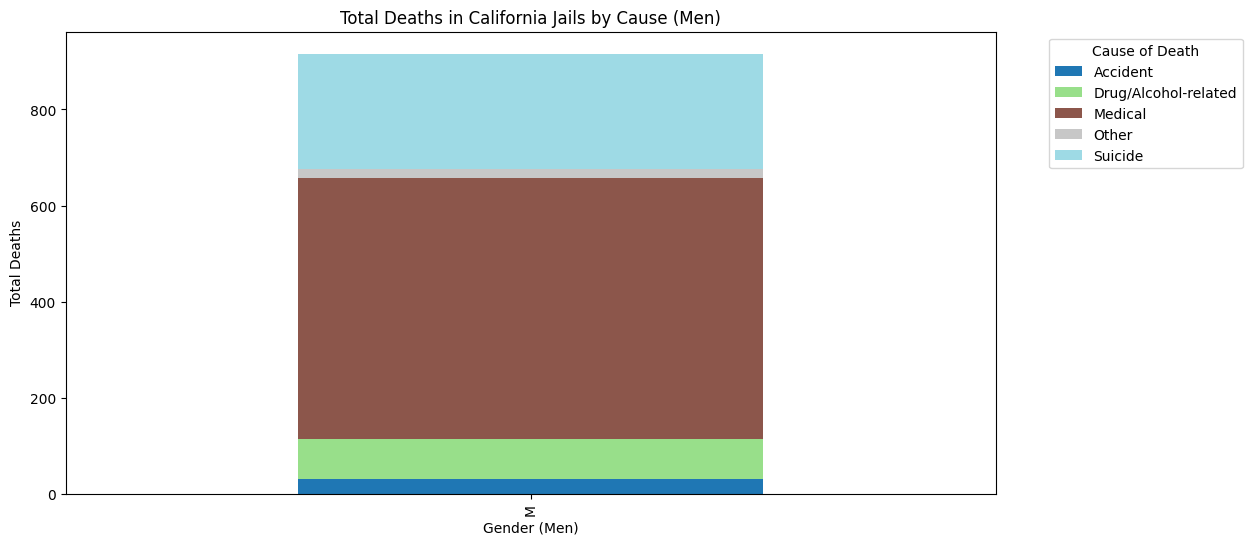

<Figure size 1200x600 with 0 Axes>

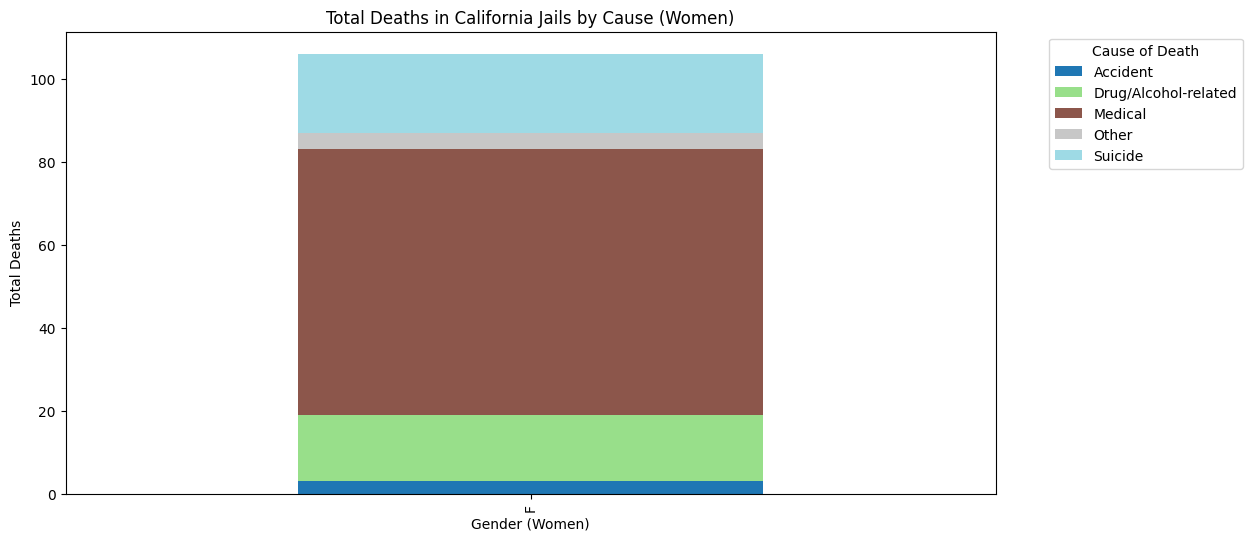

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cause_descriptions = {
    'S': 'Suicide',
    'DA': 'Drug/Alcohol-related',
    'IL': 'Illness/Natural',
    'O': 'Other',
    'HO': 'Homicide',
    'AC': 'Accident',
    'M': 'Medical',
}

deaths_data['cause_description'] = deaths_data['cause_short'].map(cause_descriptions)

# filter the data to include only necessary columns
deaths_data_filtered = deaths_data[['gender', 'cause_description']]

# count number of deaths for each cause by gender
deaths_by_gender_and_cause = deaths_data_filtered.groupby(['gender', 'cause_description']).size().reset_index(name='count')

deaths_pivot = deaths_by_gender_and_cause.pivot(index='gender', columns='cause_description', values='count').fillna(0)

deaths_pivot_men = deaths_pivot.loc[['M']]
deaths_pivot_women = deaths_pivot.loc[['F']]

# stacked bar chart for men
plt.figure(figsize=(12, 6))
deaths_pivot_men.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.xlabel('Gender (Men)')
plt.ylabel('Total Deaths')
plt.title('Total Deaths in California Jails by Cause (Men)')
plt.legend(title='Cause of Death', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# stacked bar chart for women
plt.figure(figsize=(12, 6))
deaths_pivot_women.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.xlabel('Gender (Women)')
plt.ylabel('Total Deaths')
plt.title('Total Deaths in California Jails by Cause (Women)')
plt.legend(title='Cause of Death', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


From the above charts, we can analyze the shares of death by each cause of death. Women had a higher share of Drug/Alcohol related deaths than men. Both groups have "medical" related deaths as their highest cause of death.

Let's also analyze the number of deaths per county jail in California as our final data visualization, and call back earlier research to build up the concluding remarks.

/var/folders/pf/f0c0xkcd6ns9h2v0mmkzpp3c0000gn/T/ipykernel_91221/3404986165.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




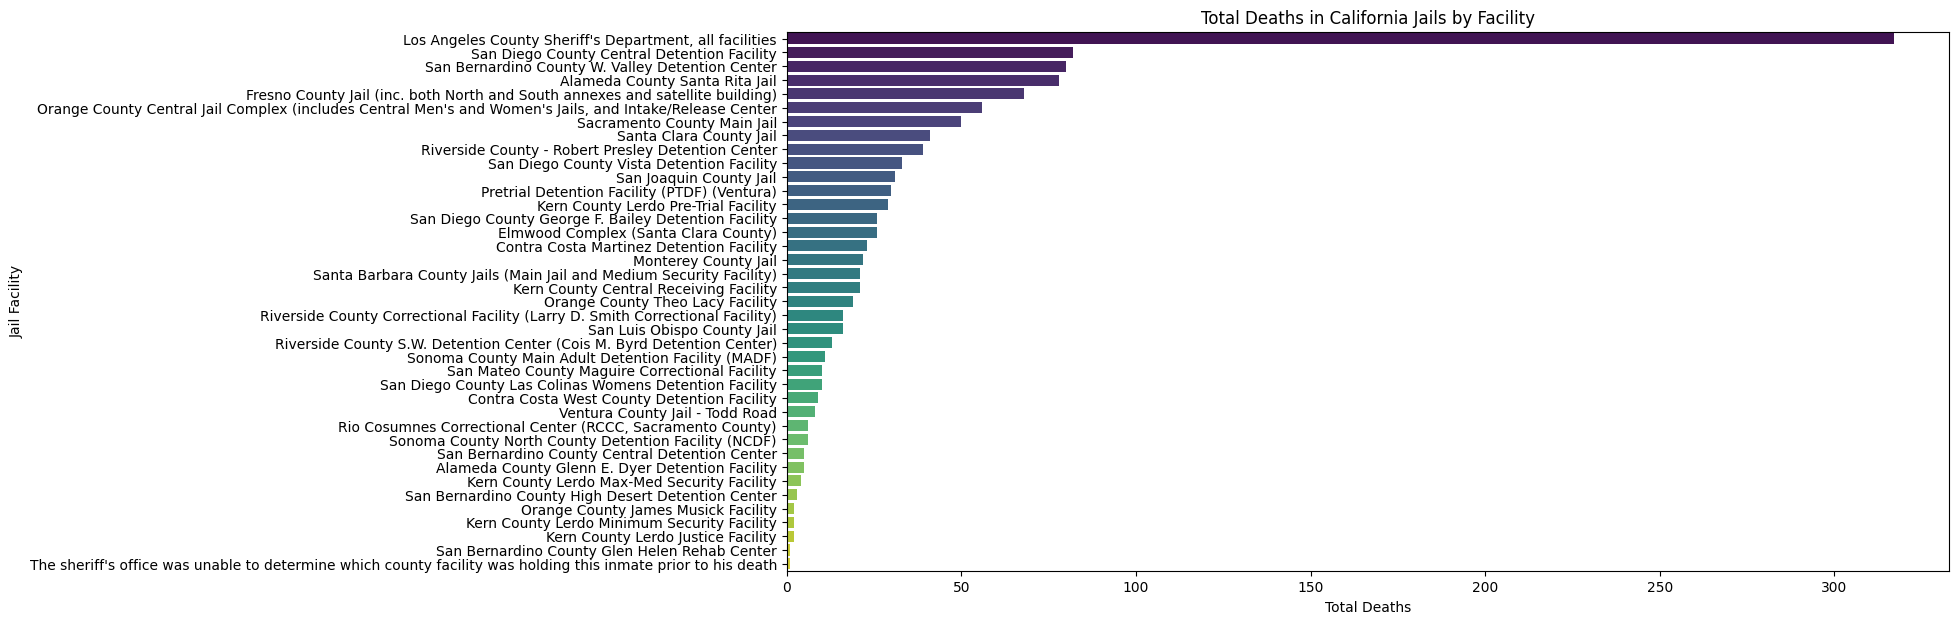

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data to include only necessary columns
deaths_data_filtered = deaths_data[['jail', 'gender']]

# Count the number of deaths for each jail facility
deaths_by_jail = deaths_data_filtered['jail'].value_counts().reset_index()
deaths_by_jail.columns = ['jail', 'count']

# Plotting the data
plt.figure(figsize=(15, 7))
sns.barplot(data=deaths_by_jail, x='count', y='jail', palette='viridis')
plt.xlabel('Total Deaths')
plt.ylabel('Jail Facility')
plt.title('Total Deaths in California Jails by Facility')
plt.show()


From the above chart, we can see which California jails have the most deaths. The LA County jail system has the most, followed by San Diego. While analyzing the chart, you can observe that a lot of the top death tolls come from Southern California jails. This could suggest lack of funding or resources in those Southern California jails.

**Sources:**
1. **Analysis of Prison Health Care in Southern California, published in December 2021:** chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://scholarworks.calstate.edu/downloads/9c67wv17g
This report explores the funding that certain California jails receive, and how inadequate the funding is for tending to inmates. One of the prisons with poor funding is Calipatria State Prison (in Southern California), where "the entire cost of non-labor-related medical care (adjusted by a cost-of-living adjustment component) is only $52 per inmate per month." For California Men's Colony in San Luis Obispo county, "this medical care cost totals $217 per inmate, per month."

### Concluding Remarks About My Research Question ###
Let's revisit my initial question: **"What are the leading factors that influence death tolls in California jails and how can they be mitigated?"**

The leading factors are:
1. Lack of quality health care in prisons
2. Neglect of mental health issues and drug/substance abuse
3. Lack of funding for jails

How can these factors be mitigated in order to prevent future deaths in jails?
1. As explored earlier, California was fined $112 million for not providing quality mental health care to inmates; the state attempted to cut costs for the Department of Corrections and Rehabilitation. The federal judge that fined the state required that the fine be used for inmate help, which is a good first step. These funds can be used to fill the demand for healthcare.
2. Increase supply of healthcare resources to curb the demand for healthcare. As found in earlier research, in 2012, there were 2.3 million health-care related visits that were provided to county jail inmates in California, averaging out to 2.4 medical visits per inmate. With preventive healthcare, inmate deaths can be reduced.
3. Using the chart for deaths per jail facility, we can understand which county jail systems need the most funding, and allocate the funds as such. For example, Los Angeles could receive the largest share of funding since its jail system has the most deaths.
4. Incentivize social workers and psychiatrists to fill positions in jails through higher pay and better benefits. As found in earlier research, 30% of rehabilitation-related occupations have not been filled for year.

### Concluding Remarks About The Data ###
The data for California inmate deaths was biased towards men inmate deaths, with more than 1000 male deaths and less than 200 women inmate deaths. I was able to find the leading factors for inmate deaths through my data analysis. However, understanding the behaviors of demographics, especially women inmates, was difficult just from looking at the data. This is where I did some more external research to understand how behaviors of women inmates can contribute to the inmate death toll.

Overall, from this project, I learned a lot about how to make meaningful claims out of a dataset and back those claims using outside sources. This was my first time ever analyzing a dataset using a Python notebook, and first time learning about the grave reasons for deaths in jails. 